# Sentiment Analysis and Zero-Shot Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Eliminator.csv to Eliminator.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Eliminator.csv']))

In [4]:
df

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
0,7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,2021-08-06,21
1,7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,2021-06-29,47
2,7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,organic reviews,2.97,5,0,0,0,No,this stuff really works well,2021-07-10,5
3,7467,Garden,67339,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-16T00:00:00,2021,6,24,"review of Eliminator Ant, Flea and Tick Killer...",be sure you make sure you get the right one. T...,organic reviews,2.97,3,0,0,0,No,be sure you make sure you get the right one. t...,2021-06-16,19
4,7468,Garden,67340,"Eliminator Ant, Flea & Tick Killer Plus Granul...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,55283731,55283735,No,2021-06-08T00:00:00,2021,6,23,NaN,it works real quick I seen a different right away,organic reviews,5.86,5,0,0,0,No,it works real quick i seen a different right away,2021-06-08,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,28339,Garden,150251,"Eliminator Total Vegetation Killer Herbicide, ...",https://www.walmart.com//ip/Eliminator-Total-V...,Walmart,Eliminator,669105534,935703842,Yes,2022-06-16T00:00:00,2022,6,24,Okay,You have to mix it very strong. I add a couple...,organic reviews,16.96,3,0,0,0,No,you have to mix it very strong. i add a couple...,2022-06-16,62
275,28412,Garden,150324,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,2.88,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15
276,28413,Garden,150325,"Eliminator Weed & Grass Killer Herbicide, Gall...",https://www.walmart.com//ip/Eliminator-Weed-Gr...,Walmart,Eliminator,316196077,316196077,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,7.48,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15
277,28414,Garden,150326,"Eliminator Ready-to-Use Weed & Grass Killer, H...",https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,599339955,490858787,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,14.68,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15


In [5]:
len(df)

279

# Sentiment Analysis

In [6]:
!pip install torch torchvision torchvision
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000,1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(-211.76297, shape=(), dtype=float32)


In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 51.0 MB/s 
     |████████████████████████████████| 163 kB 57.4 MB/s 


In [8]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Positive', 'score': 0.8467649221420288}]

In [10]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260


In [11]:
df

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment
0,7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,2021-08-06,21,Positive
1,7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,2021-06-29,47,Positive
2,7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,organic reviews,2.97,5,0,0,0,No,this stuff really works well,2021-07-10,5,Positive
3,7467,Garden,67339,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-16T00:00:00,2021,6,24,"review of Eliminator Ant, Flea and Tick Killer...",be sure you make sure you get the right one. T...,organic reviews,2.97,3,0,0,0,No,be sure you make sure you get the right one. t...,2021-06-16,19,Neutral
4,7468,Garden,67340,"Eliminator Ant, Flea & Tick Killer Plus Granul...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,55283731,55283735,No,2021-06-08T00:00:00,2021,6,23,NaN,it works real quick I seen a different right away,organic reviews,5.86,5,0,0,0,No,it works real quick i seen a different right away,2021-06-08,10,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,28339,Garden,150251,"Eliminator Total Vegetation Killer Herbicide, ...",https://www.walmart.com//ip/Eliminator-Total-V...,Walmart,Eliminator,669105534,935703842,Yes,2022-06-16T00:00:00,2022,6,24,Okay,You have to mix it very strong. I add a couple...,organic reviews,16.96,3,0,0,0,No,you have to mix it very strong. i add a couple...,2022-06-16,62,Neutral
275,28412,Garden,150324,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,2.88,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15,Positive
276,28413,Garden,150325,"Eliminator Weed & Grass Killer Herbicide, Gall...",https://www.walmart.com//ip/Eliminator-Weed-Gr...,Walmart,Eliminator,316196077,316196077,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,7.48,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15,Positive
277,28414,Garden,150326,"Eliminator Ready-to-Use Weed & Grass Killer, H...",https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,599339955,490858787,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,organic reviews,14.68,5,0,0,0,No,love it only place i can find the eliminator b...,2022-06-26,15,Positive


## Zero Shot Classificaiton

In [12]:
import transformers
from transformers import pipeline

In [13]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [14]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'These ant granules work great. Sprinkle and the ants carry it back to the nest and that mound is gone for the rest of the summer.  I sprinkle it around the base of the house and have only only a very few ants inside this season.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9945958256721497,
  0.7802573442459106,
  0.6162616014480591,
  0.010357310064136982]}

In [15]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'This stuff really works well',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9986035227775574,
  0.6216884255409241,
  0.5506457090377808,
  0.003692884696647525]}

In [16]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'be sure you make sure you get the right one. This is OUTDOOR and I needed INDOOR on carpeting.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.6274811625480652,
  0.13011987507343292,
  0.07983136922121048,
  0.0609724335372448]}

In [17]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'it works real quick I seen a different right away',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9438151121139526,
  0.795564591884613,
  0.4779480993747711,
  0.011570680886507034]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [18]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [19]:
# insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [20]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260


In [21]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
0,7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,2021-08-06,21,Positive,0.952968,0.968863,0.997902,0.979306,0.997902
1,7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,2021-06-29,47,Positive,0.765568,0.993307,0.997978,0.968285,0.997978
2,7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,organic reviews,2.97,5,0,0,0,No,this stuff really works well,2021-07-10,5,Positive,0.179327,0.996241,0.998811,0.974390,0.998811


In [22]:
#assign the max to its aligned type
align_list=[]
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      align_list.append(t)
      
df['align_type']=align_list

In [23]:
df.head(3)

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max,align_type
0,7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,2021-08-06,21,Positive,0.952968,0.968863,0.997902,0.979306,0.997902,effective
1,7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,2021-06-29,47,Positive,0.765568,0.993307,0.997978,0.968285,0.997978,effective
2,7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,organic reviews,2.97,5,0,0,0,No,this stuff really works well,2021-07-10,5,Positive,0.179327,0.996241,0.998811,0.974390,0.998811,effective


In [24]:
import seaborn as sns

In [25]:
# Create Pivot table for the Heatmap
table = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc=np.mean,fill_value=0)
table

align_type,cost,ease of use,effective,efficient
sentiment,,,,
Negative,0.813354,0.680183,0.969977,0.982405
Neutral,0.768849,0.994983,0.961414,0.851260
Positive,0.632460,0.981253,0.991657,0.997238


<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

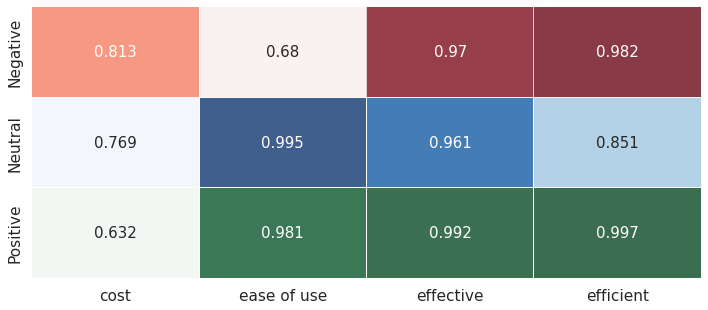

In [26]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Metric and Sanity Check

0.9175627240143369

['these ant granules work great. sprinkle and the ants carry it back to the nest and that mound is gone for the rest of the summer.  i sprinkle it around the base of the house and have only only a very few ants inside this season.']

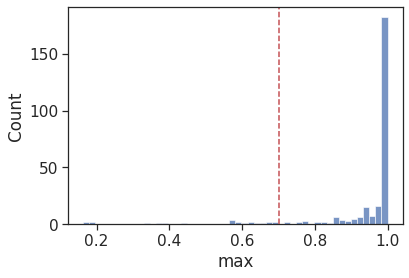

In [29]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
#for container in ax.containers:
#    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [30]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3 to 272
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23 non-null     int64  
 1   segment               23 non-null     object 
 2   review_id             23 non-null     int64  
 3   product_name          23 non-null     object 
 4   producturl            23 non-null     object 
 5   retailer              23 non-null     object 
 6   brand                 23 non-null     object 
 7   retailer_product_id   23 non-null     int64  
 8   base_id               23 non-null     int64  
 9   variants_flag         23 non-null     object 
 10  review_creation_date  23 non-null     object 
 11  year                  23 non-null     int64  
 12  month                 23 non-null     int64  
 13  week                  23 non-null     int64  
 14  review_title          21 non-null     object 
 15  review_text           23

In [31]:
#df_uncat.to_csv('data/unlabeld_data.csv')